In [1]:
import matplotlib.pyplot as plt
import pytesseract
import numpy as np
from PIL import Image
import cv2 

pytesseract.pytesseract.tesseract_cmd = r'C:\Users\wilko\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'


In [2]:
test_img = cv2.imread(r'C:\Users\wilko\Desktop\Studia\Projekty studia\Optymalizacja dyskretna - Sudoku\Dane\Pierdoly\ocr_test.PNG')

In [3]:
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

In [4]:
WIDTH = test_img.shape[1]
HEIGHT = test_img.shape[0]

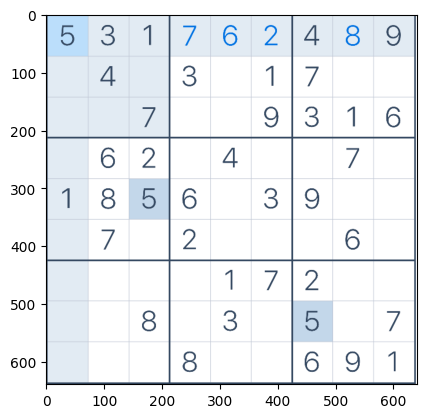

In [5]:
plt.imshow(test_img)

In [6]:
test_img = cv2.resize(test_img,(2 * WIDTH, 2 * HEIGHT))

In [7]:
gray_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)


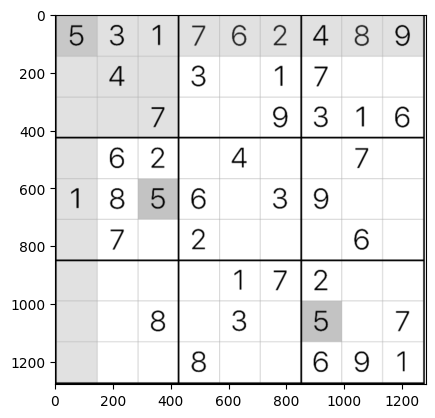

In [8]:
plt.imshow(gray_img, cmap='gray')

In [9]:
_,binary_img = cv2.threshold(gray_img,127,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

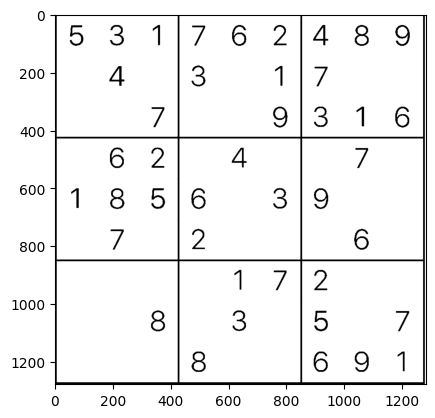

In [10]:
plt.imshow(binary_img, cmap='gray')

In [11]:
binary_img.shape

(1278, 1282)

In [12]:
binary_img.shape[0]//9

142

In [13]:
binary_img.shape[1]//9

142

In [14]:
line_coord_x = binary_img.shape[1]//3
line_coord_y = binary_img.shape[0]//3


cv2.line(binary_img, (0,line_coord_y),(binary_img.shape[1],line_coord_y),(255,255,255),15)
cv2.line(binary_img, (0,line_coord_y*2),(binary_img.shape[1],line_coord_y*2),(255,255,255),15)

cv2.line(binary_img, (line_coord_x,0),(line_coord_x,binary_img.shape[0]),(255,255,255),15)
cv2.line(binary_img, (line_coord_x*2,0),(line_coord_x*2,binary_img.shape[0]),(255,255,255),15)

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

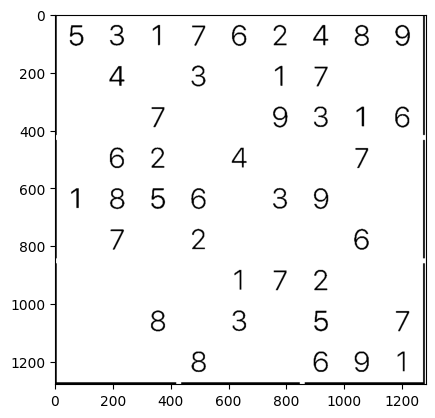

In [15]:
plt.imshow(binary_img,cmap='gray')

In [16]:
images = []

cell_size = binary_img.shape[0]//9

y_start = 0
y_end = binary_img.shape[0]//9

x_start = 0
x_end = binary_img.shape[1]//9

for i in range(1,10):
    for j in range(1,10):
        images.append(binary_img[y_start : y_end, x_start : x_end])
        x_start += cell_size
        x_end += cell_size
    
    x_start = 0
    x_end = cell_size

    y_start += cell_size
    y_end += cell_size

In [17]:
cell1 = binary_img[3:104, 3:104]

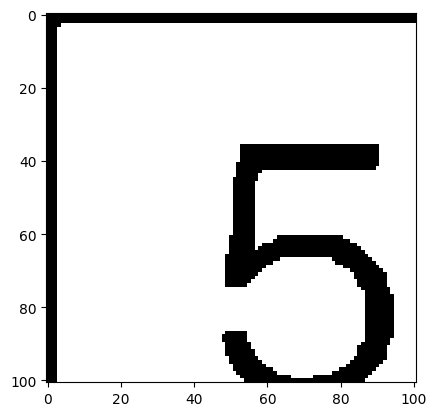

In [18]:
plt.imshow(cell1, cmap='gray')

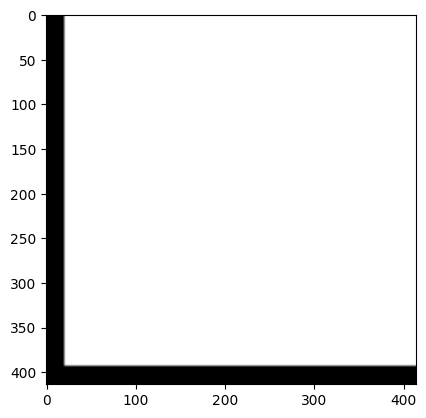

In [19]:
kernel = np.ones((3,3),np.uint8)
dilation_test = cv2.dilate(cv2.bitwise_not(images[72]),kernel,iterations = 1)
dilation_test = cv2.bitwise_not(dilation_test)
dilation_test = cv2.resize(dilation_test,(138*3,138*3))
plt.imshow(dilation_test, cmap='gray')

In [20]:
ocr_test1 = pytesseract.image_to_string(
        dilation_test, config='--psm 13 --oem 3 -c tessedit_char_whitelist=123456789')


In [21]:
ocr_test1

''

In [36]:
blur = cv2.GaussianBlur(binary_img, (5, 5), 0)
sharp = cv2.Laplacian(blur, cv2.CV_64F)
sharpening_test = cv2.convertScaleAbs(sharp)
sharpening_test = cv2.bitwise_not(sharpening_test)

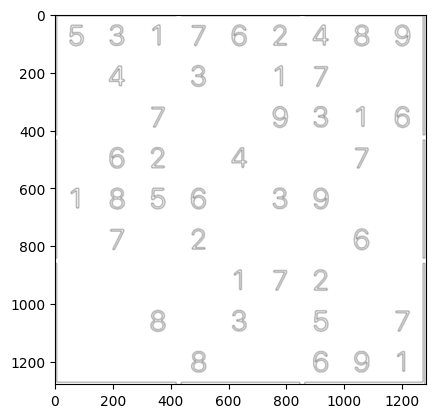

In [39]:
plt.imshow(sharpening_test, cmap='gray')

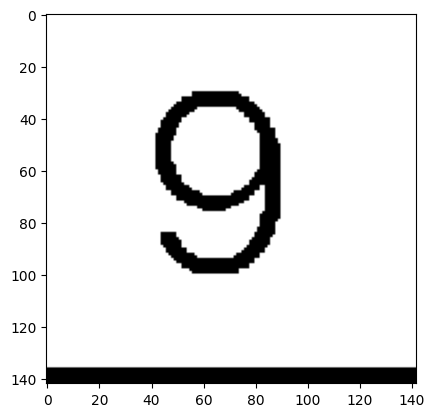

In [22]:
plt.imshow(images[79],cmap='gray')

In [23]:
ocr_test1 = pytesseract.image_to_string(
        images[79], config='--psm 10 --oem 3 -c tessedit_char_whitelist=123456789')

In [24]:
ocr_test1

''

In [25]:
ocr_test1 = ocr_test1.replace("\n", " ")

In [26]:
ocr_test1

''

In [27]:
sudoku_board = []
for image in images:
    ocr_result = pytesseract.image_to_string(image, config='--psm 13 --oem 3 -c tessedit_char_whitelist=123456789')
    if ocr_result != '':
        sudoku_board.append(int(ocr_result))
    else: 
        sudoku_board.append(0)

In [28]:
sudoku_board = np.array(sudoku_board)
sudoku_board

array([5, 3, 1, 7, 6, 2, 0, 8, 9, 0, 4, 0, 3, 0, 1, 7, 0, 0, 0, 0, 7, 0,
       0, 9, 3, 1, 6, 0, 6, 2, 0, 4, 0, 0, 7, 0, 1, 8, 5, 6, 0, 3, 0, 0,
       0, 0, 7, 0, 2, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 7, 2, 0, 0, 0, 0, 8,
       0, 3, 0, 5, 0, 7, 0, 0, 0, 8, 0, 0, 6, 2, 1])

In [29]:
sudoku_board.size

81

In [30]:
sudoku_board.reshape((9,9))

array([[5, 3, 1, 7, 6, 2, 0, 8, 9],
       [0, 4, 0, 3, 0, 1, 7, 0, 0],
       [0, 0, 7, 0, 0, 9, 3, 1, 6],
       [0, 6, 2, 0, 4, 0, 0, 7, 0],
       [1, 8, 5, 6, 0, 3, 0, 0, 0],
       [0, 7, 0, 2, 0, 0, 0, 6, 0],
       [0, 0, 0, 0, 1, 7, 2, 0, 0],
       [0, 0, 8, 0, 3, 0, 5, 0, 7],
       [0, 0, 0, 8, 0, 0, 6, 2, 1]])